In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# EDA DE user_reviews

## Obtencion del dataframe user_reviews

In [2]:
# cargar a un dataframe de pandas
df_reviews = pd.read_csv('345e.csv', encoding='utf-8')
df_reviews

,user_id,user_url,reviews_posted,reviews_item_id,reviews_helpful,reviews_recommend,sentiment_analysis,año_lanzamiento
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,2,2009
1,EndAtHallow,http://steamcommunity.com/id/EndAtHallow,"Posted January 15, 2015.",1250,No ratings yet,True,2,2009
2,76561198107847795,http://steamcommunity.com/profiles/76561198107...,"Posted December 12, 2014.",1250,No ratings yet,True,1,2009
3,usaidwotnow,http://steamcommunity.com/id/usaidwotnow,"Posted December 13, 2013.",1250,0 of 1 people (0%) found this review helpful,True,0,2009
4,76561198081529182,http://steamcommunity.com/profiles/76561198081...,"Posted August 19, 2014.",1250,2 of 3 people (67%) found this review helpful,True,2,2009
...,...,...,...,...,...,...,...,...
50213,julez225,http://steamcommunity.com/id/julez225,"Posted May 17, 2012.",73010,No ratings yet,True,0,2011
50214,76561198063128416,http://steamcommunity.com/profiles/76561198063...,Posted June 13.,378930,3 of 17 people (18%) found this review helpful,False,1,2016
50215,76561198029064257,http://steamcommunity.com/profiles/76561198029...,"Posted October 22, 2012.",16600,No ratings yet,True,2,2008
50216,Darkjet15,http://steamcommunity.com/id/Darkjet15,"Posted January 19, 2014.",232950,No ratings yet,True,0,2013


## Informacion general del dataframe

In [4]:
# obtener dimensiones del dataframe
print(f'La cantidad de registros que hay son: {df_reviews.shape[0]}')
# revisar tipos de datos y existencias de nulos
df_reviews.info()
df_reviews.isnull().sum()

La cantidad de registros que hay son: 50218
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50218 entries, 0 to 50217
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             50218 non-null  object
 1   user_url            50218 non-null  object
 2   reviews_posted      50218 non-null  object
 3   reviews_item_id     50218 non-null  int64 
 4   reviews_helpful     50218 non-null  object
 5   reviews_recommend   50218 non-null  bool  
 6   sentiment_analysis  50218 non-null  int64 
 7   año_lanzamiento     50218 non-null  int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 2.7+ MB


user_id               0
user_url              0
reviews_posted        0
reviews_item_id       0
reviews_helpful       0
reviews_recommend     0
sentiment_analysis    0
año_lanzamiento       0
dtype: int64

## Exploracion de las posibles relaciones

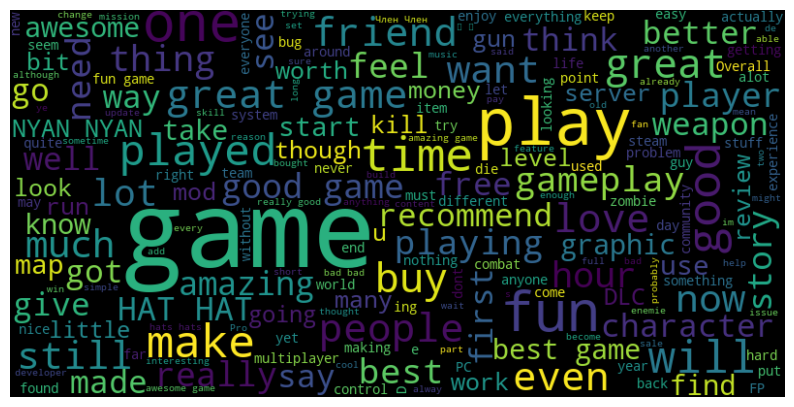

In [4]:
df_reviews0 =pd.read_csv('232_aur.csv')
# Concatena todas las reviews en una sola cadena de texto
all_reviews = ' '.join(df_reviews0['reviews_review'].dropna())

# Crea un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_reviews)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
# agrupar por sentiment_analysis y reviews_recommend
df_agrupado = df_reviews.groupby(['sentiment_analysis', 'reviews_recommend'])
# contar la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# calcular el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_reviews)
# crear dataframe con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analysis reviews_recommend                      
0                  False                  2665    5.306862
                   True                   8033   15.996256
1                  False                  1149    2.288024
                   True                   9693   19.301844
2                  False                  1530    3.046716
                   True                  27148   54.060297

16% de los reviews recomiendan a pesar de tener un sentimiento negativo, muy cercano al 19% de los reviews que tienen sentimiento neutral; pero, muy superados por el 54% de los que tienen un sentimiento positivo. Los que no recomiendan suman aproximadamente el 10% de los reviews.

# EDA DE steam_games

## Obtencion del dataframe steam_games

In [22]:
# cargar a un dataframe de pandas
df_games = pd.read_csv('231_osg.csv', encoding='utf-8')
df_games.head()

,publisher,genres,app_name,title,price,early_access,id,developer,año_lanzamiento
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
1,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
2,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
3,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
4,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0


## Informacion general del dataframe

In [15]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71552 entries, 0 to 71551
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   publisher        59066 non-null  object 
 1   genres           71552 non-null  object 
 2   app_name         71550 non-null  object 
 3   title            71550 non-null  object 
 4   price            71552 non-null  float64
 5   early_access     71552 non-null  float64
 6   id               71552 non-null  int64  
 7   developer        71318 non-null  object 
 8   año_lanzamiento  70702 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.9+ MB


## Exploracion de las posibles relaciones

In [23]:
# eliminar columna publisher
df_games=df_games.drop('publisher', axis=1)
# eliminar registros nulos
df_games = df_games.dropna()

df_games

,genres,app_name,title,price,early_access,id,developer,año_lanzamiento
0,Action,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
1,Casual,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
2,Indie,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
3,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
4,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140,Kotoshiro,2018.0
...,...,...,...,...,...,...,...,...
71547,Indie,Russian Roads,Russian Roads,1.99,0.0,610660,Laush Dmitriy Sergeevich,2018.0
71548,Racing,Russian Roads,Russian Roads,1.99,0.0,610660,Laush Dmitriy Sergeevich,2018.0
71549,Simulation,Russian Roads,Russian Roads,1.99,0.0,610660,Laush Dmitriy Sergeevich,2018.0
71550,Casual,EXIT 2 - Directions,EXIT 2 - Directions,4.99,0.0,658870,"xropi,stev3ns",2017.0


28430


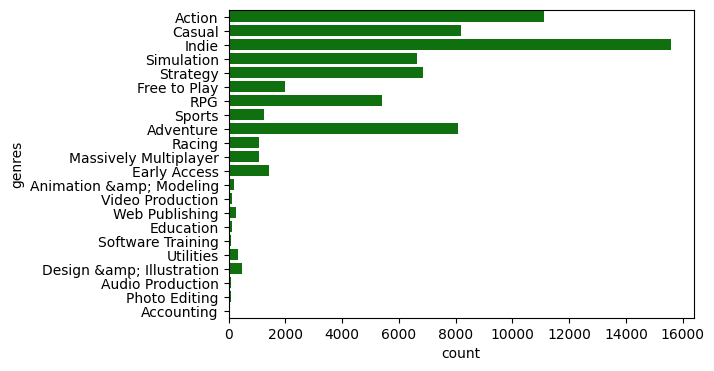

In [33]:
# obtener cantidad total de juegos
total_juegos = len(df_games['id'].unique())
print(total_juegos)
# ver distribucion de la cantidad de generos
plt.figure(figsize=(6, 4))
sns.countplot(data=df_games, y='genres', orient='h', color= 'green')
plt.show()

Los generos Indie, Action, Casual y Adventure son los que tienen mayor cantidad

# EDA DE user_items

## Obtencion del dataframe user_items

In [36]:
df_items = pd.read_csv('233_aui.csv', encoding='utf-8')
df_items.head()

,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


## Informacion general del dataframe

In [37]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
 3   steam_id          int64 
 4   items_count       int64 
 5   user_id           object
 6   user_url          object
dtypes: int64(4), object(3)
memory usage: 272.1+ MB


## Exploracion de las posibles relaciones

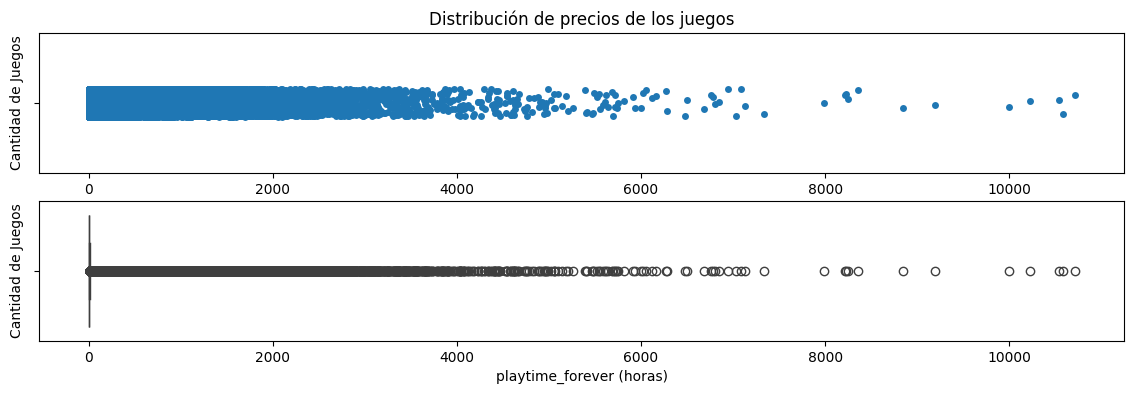

In [43]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')
plt.show()

In [42]:
df_items['playtime_hours'].describe()

count    5.094105e+06
mean     1.650918e+01
std      9.023828e+01
min      0.000000e+00
25%      0.000000e+00
50%      5.666667e-01
75%      5.916667e+00
max      1.071288e+04
Name: playtime_hours, dtype: float64

Hasta un 50% juegan un poco más de media hora y hasta un 75% juegan un poco menos de 6 horas

# CREACION DE ARCHIVOS PARA EL SISTEMA DE RECOMENDACION

## Obtencion de los dataframes

In [44]:
df_items = pd.read_csv('233_aui.csv', encoding='utf-8')
df_reviews = pd.read_csv('345e.csv', encoding='utf-8')

In [46]:
# definir funcion para crear una nueva columna 
def calcula_rating(row):
    '''
    1 si el análisis de sentimiento es negativo ya sea que este recomendado o no (True o False)
    2 si el análisis de sentimiento es neutral y no es recomendado (False)
    3 si el análisis de sentimiento es neutral pero es recomendado (True)
    4 si el análisis de sentimiento es positivo y no es recomendado (False)
    5 si el análisis de sentimiento es positivo y es recomendado (True)
    '''
    if row["sentiment_analysis"] == 0 and not row["reviews_recommend"]:
        return 1
    elif row["sentiment_analysis"] == 0 and row["reviews_recommend"]:
        return 1
    elif row["sentiment_analysis"] == 1 and not row["reviews_recommend"]:
        return 2
    elif row["sentiment_analysis"] == 1 and row["reviews_recommend"]:
        return 3
    elif row["sentiment_analysis"] == 2 and not row["reviews_recommend"]:
        return 4
    elif row["sentiment_analysis"] == 2 and row["reviews_recommend"]:
        return 5
    else:
        return None


## Creacion de la nueva columna para el sistema de recomendacion

In [47]:
# aplicar la funcion para crear la nueva columna rating
df_reviews['rating'] = df_reviews.apply(calcula_rating, axis=1)
df_reviews

,user_id,user_url,reviews_posted,reviews_item_id,reviews_helpful,reviews_recommend,sentiment_analysis,año_lanzamiento,rating
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,No ratings yet,True,2,2009,5
1,EndAtHallow,http://steamcommunity.com/id/EndAtHallow,"Posted January 15, 2015.",1250,No ratings yet,True,2,2009,5
2,76561198107847795,http://steamcommunity.com/profiles/76561198107...,"Posted December 12, 2014.",1250,No ratings yet,True,1,2009,3
3,usaidwotnow,http://steamcommunity.com/id/usaidwotnow,"Posted December 13, 2013.",1250,0 of 1 people (0%) found this review helpful,True,0,2009,1
4,76561198081529182,http://steamcommunity.com/profiles/76561198081...,"Posted August 19, 2014.",1250,2 of 3 people (67%) found this review helpful,True,2,2009,5
...,...,...,...,...,...,...,...,...,...
50213,julez225,http://steamcommunity.com/id/julez225,"Posted May 17, 2012.",73010,No ratings yet,True,0,2011,1
50214,76561198063128416,http://steamcommunity.com/profiles/76561198063...,Posted June 13.,378930,3 of 17 people (18%) found this review helpful,False,1,2016,2
50215,76561198029064257,http://steamcommunity.com/profiles/76561198029...,"Posted October 22, 2012.",16600,No ratings yet,True,2,2008,5
50216,Darkjet15,http://steamcommunity.com/id/Darkjet15,"Posted January 19, 2014.",232950,No ratings yet,True,0,2013,1


## Creacion de un nuevo dataframe para el sistema de recomendacion

In [52]:
df1 = df_reviews[['user_id', 'reviews_item_id', 'rating']]
df2 = df_items[['item_id', 'item_name']]
# borrar dumplicados
df2 = df2.drop_duplicates()
df = df1.merge(df2, left_on="reviews_item_id", right_on="item_id", how='left')
# borrar nulos
df = df.dropna(subset=['item_id'])
df = df[['user_id', 'item_name', 'rating']]
df

,user_id,item_name,rating
0,76561197970982479,Killing Floor,5
1,EndAtHallow,Killing Floor,5
2,76561198107847795,Killing Floor,3
3,usaidwotnow,Killing Floor,1
4,76561198081529182,Killing Floor,5
...,...,...,...
50213,julez225,Cities in Motion,1
50214,76561198063128416,Pesadelo - Regressão,2
50215,76561198029064257,Trials 2: Second Edition,5
50216,Darkjet15,Bridge Project,1


## Guardado del nuevo dataframe a usarse en el sistema de recomendacion

In [53]:
df.to_csv('411recomendacion.csv', index=False, encoding='utf-8')